# 가설 : K-beauty는 성장하고 있을까?
# 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import os

if os.name == "posix" :
    sns.set(font="AppleGothic")

In [3]:
%config InlineBackend.figure_format = "retina"

In [6]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20201102200938.csv", encoding='cp949')

In [8]:
df_raw["국가(대륙)별"].value_counts()

중남미           45
미국            45
중국            45
대양주           45
기타            45
일본            45
아세안(ASEAN)    45
EU            45
합계            45
중동            45
Name: 국가(대륙)별, dtype: int64

In [12]:
# 분석과 시각화를 위한 tidy data
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"],
           var_name="기간", value_name="백만원")

In [14]:
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
11695,기타,생활용품 및 자동차용품,면세점,2020 2/4 p),0
11696,기타,생활용품 및 자동차용품,면세점 이외,2020 2/4 p),334
11697,기타,기 타,계,2020 2/4 p),710
11698,기타,기 타,면세점,2020 2/4 p),0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  11700 non-null  object
 1   상품군별     11700 non-null  object
 2   판매유형별    11700 non-null  object
 3   기간       11700 non-null  object
 4   백만원      11700 non-null  object
dtypes: object(5)
memory usage: 457.2+ KB


# 데이터 전처리
## 기간에서 연도를 분리하기

In [18]:
df["기간"]

0           2014 1/4
1           2014 1/4
2           2014 1/4
3           2014 1/4
4           2014 1/4
            ...     
11695    2020 2/4 p)
11696    2020 2/4 p)
11697    2020 2/4 p)
11698    2020 2/4 p)
11699    2020 2/4 p)
Name: 기간, Length: 11700, dtype: object

In [19]:
int("2020 2/4 p".split()[0])

2020

In [134]:
# 기간에서 연도만 분리하기
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df["쿼터"] = df["기간"].map(lambda x : int(x.split()[-1]))

ValueError: invalid literal for int() with base 10: '1/4'

In [131]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기,쿼터
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1,1/4
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1,1/4
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1,1/4
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1,1/4
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1,1/4


In [27]:
# 기간에서 분기만 분리하기
# "2020 2/4 p".split()[1].split('/')[0]

df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split('/')[0]))

In [28]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


In [43]:
# r금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기
# .replace함수를 통해 -를 결측치로 바꿔주고
# .astype 을 통해서 float으로 데이터 타입을 바꿔준다.

df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)

In [50]:
# 필요없는 데이터 제거하기

df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()

In [53]:
# 백만원 데이터에 결측치가 3024개 있음
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화

In [55]:
# 전체 상품군 판매액

df_total = df[df["판매유형별"] == "계"].copy()

In [60]:
df_total["상품군별"]

48         컴퓨터 및 주변기기
51         가전·전자·통신기기
54              소프트웨어
57                서 적
60              사무·문구
             ...     
11685         아동·유아용품
11688           음·식료품
11691           농축수산물
11694    생활용품 및 자동차용품
11697             기 타
Name: 상품군별, Length: 3276, dtype: object

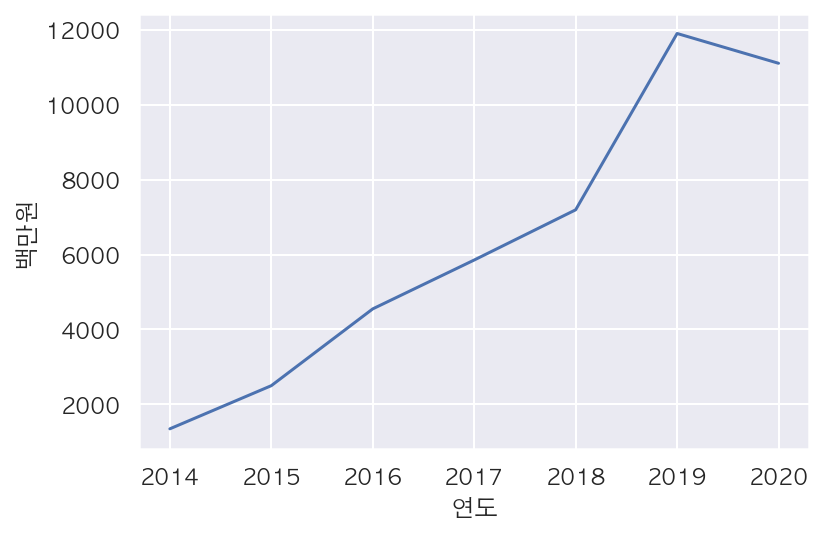

In [61]:
# 연도와 판매액을 lineplot으로 그리기

sns.lineplot(data= df_total, x = "연도", y = "백만원", ci=None)

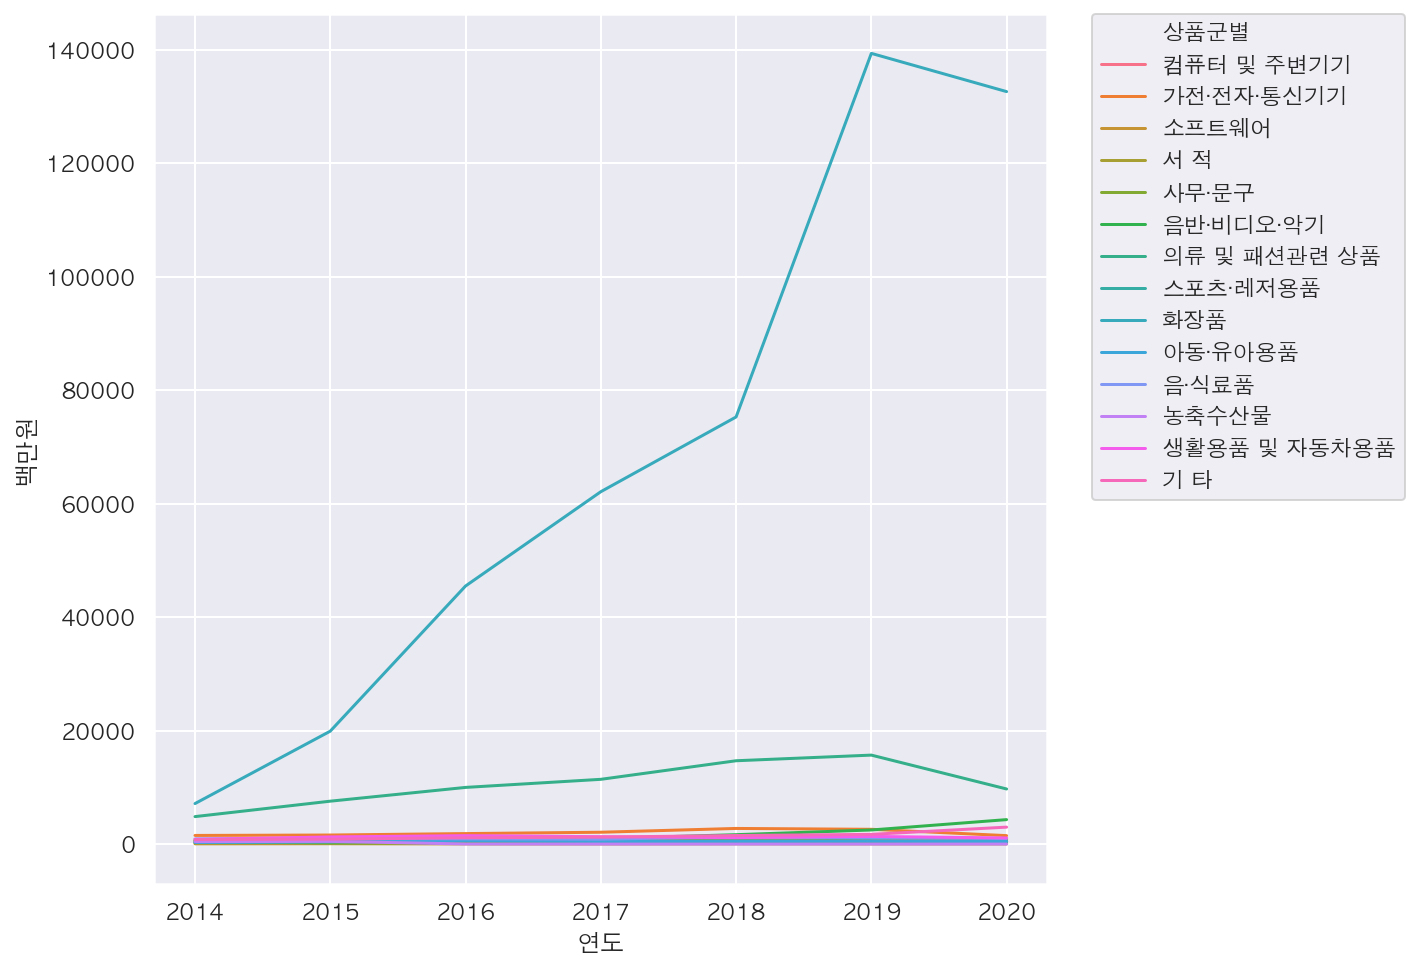

In [70]:
# 연도, 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시

plt.figure(figsize = (8,8))

sns.lineplot(data = df_total, x = "연도", y = "백만원", hue="상품군별", ci=None)

# 보더가 표 밖으로 위치하게 하는 코드
# lineplot 밑에 써야 동작함
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad=0.)

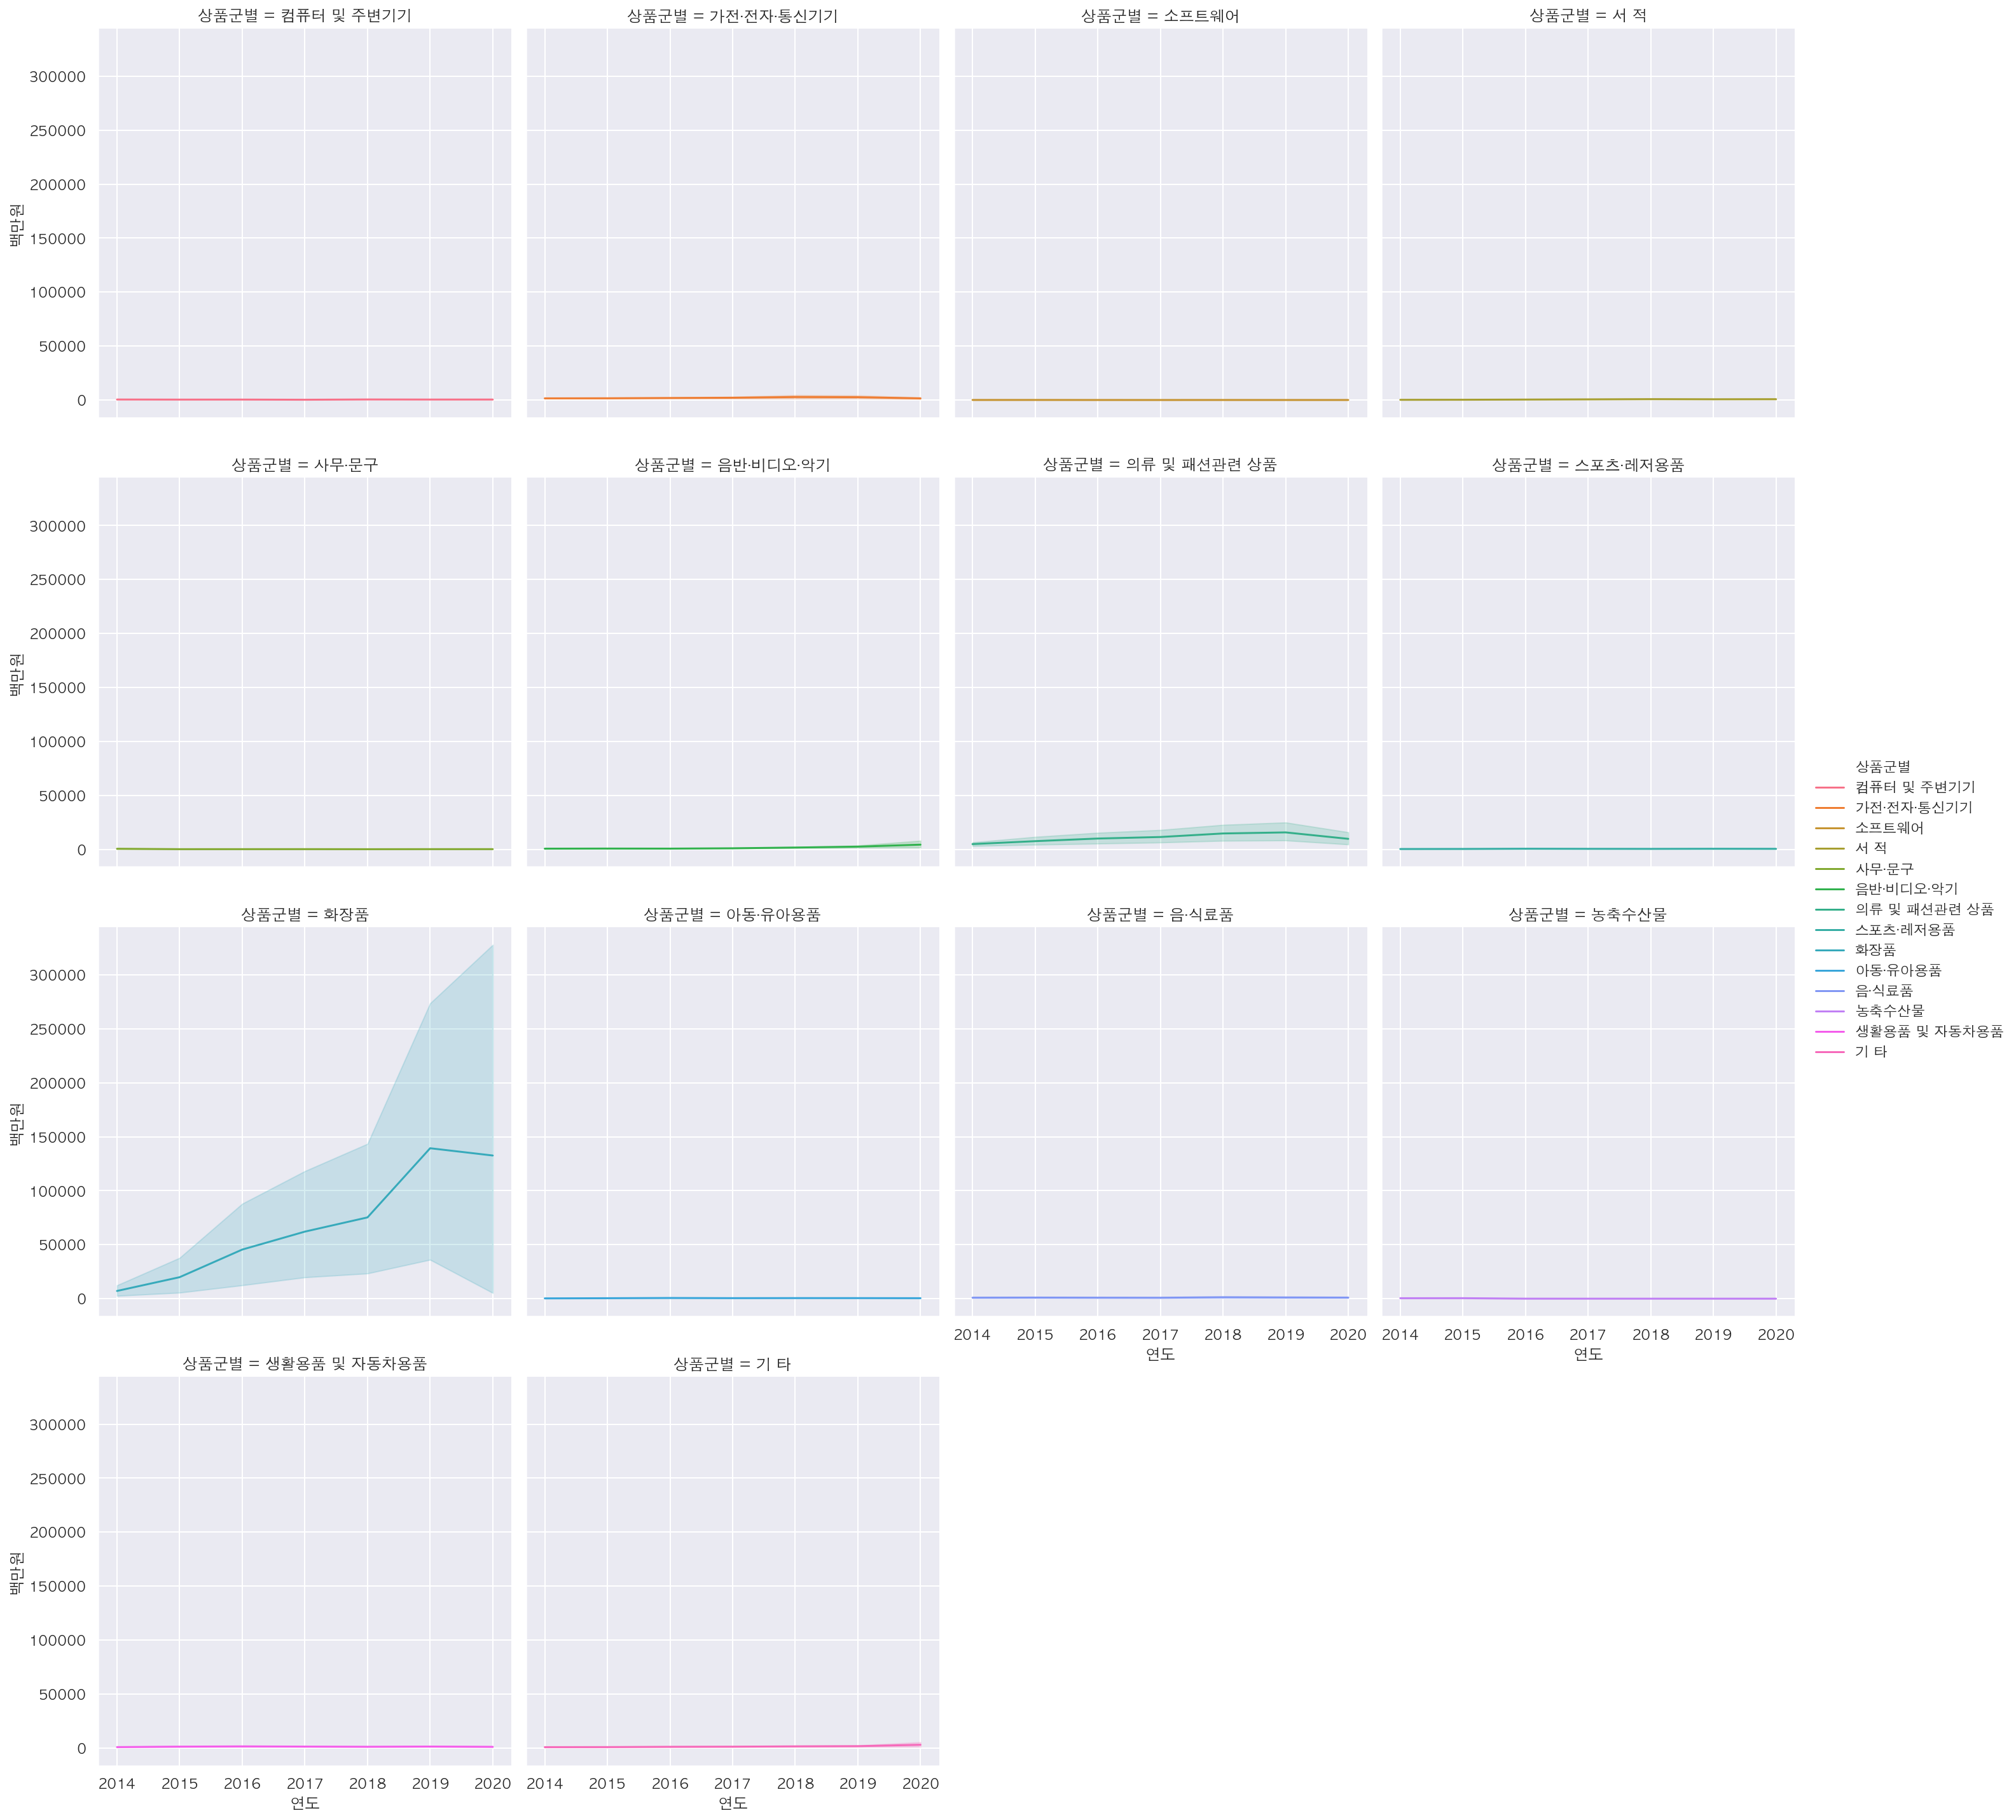

In [74]:
sns.relplot(data = df_total,x = "연도", y = "백만원", hue="상품군별", 
            kind="line", col="상품군별", col_wrap=4)

In [82]:
# 화장품의 데이터가 너무 크기 때문에 화장품을 제외한 데이터 셋 도출
# df_sub = df_total[df_total["상품군별"] != "화장품"].copy()
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션관련 상품"])].copy()

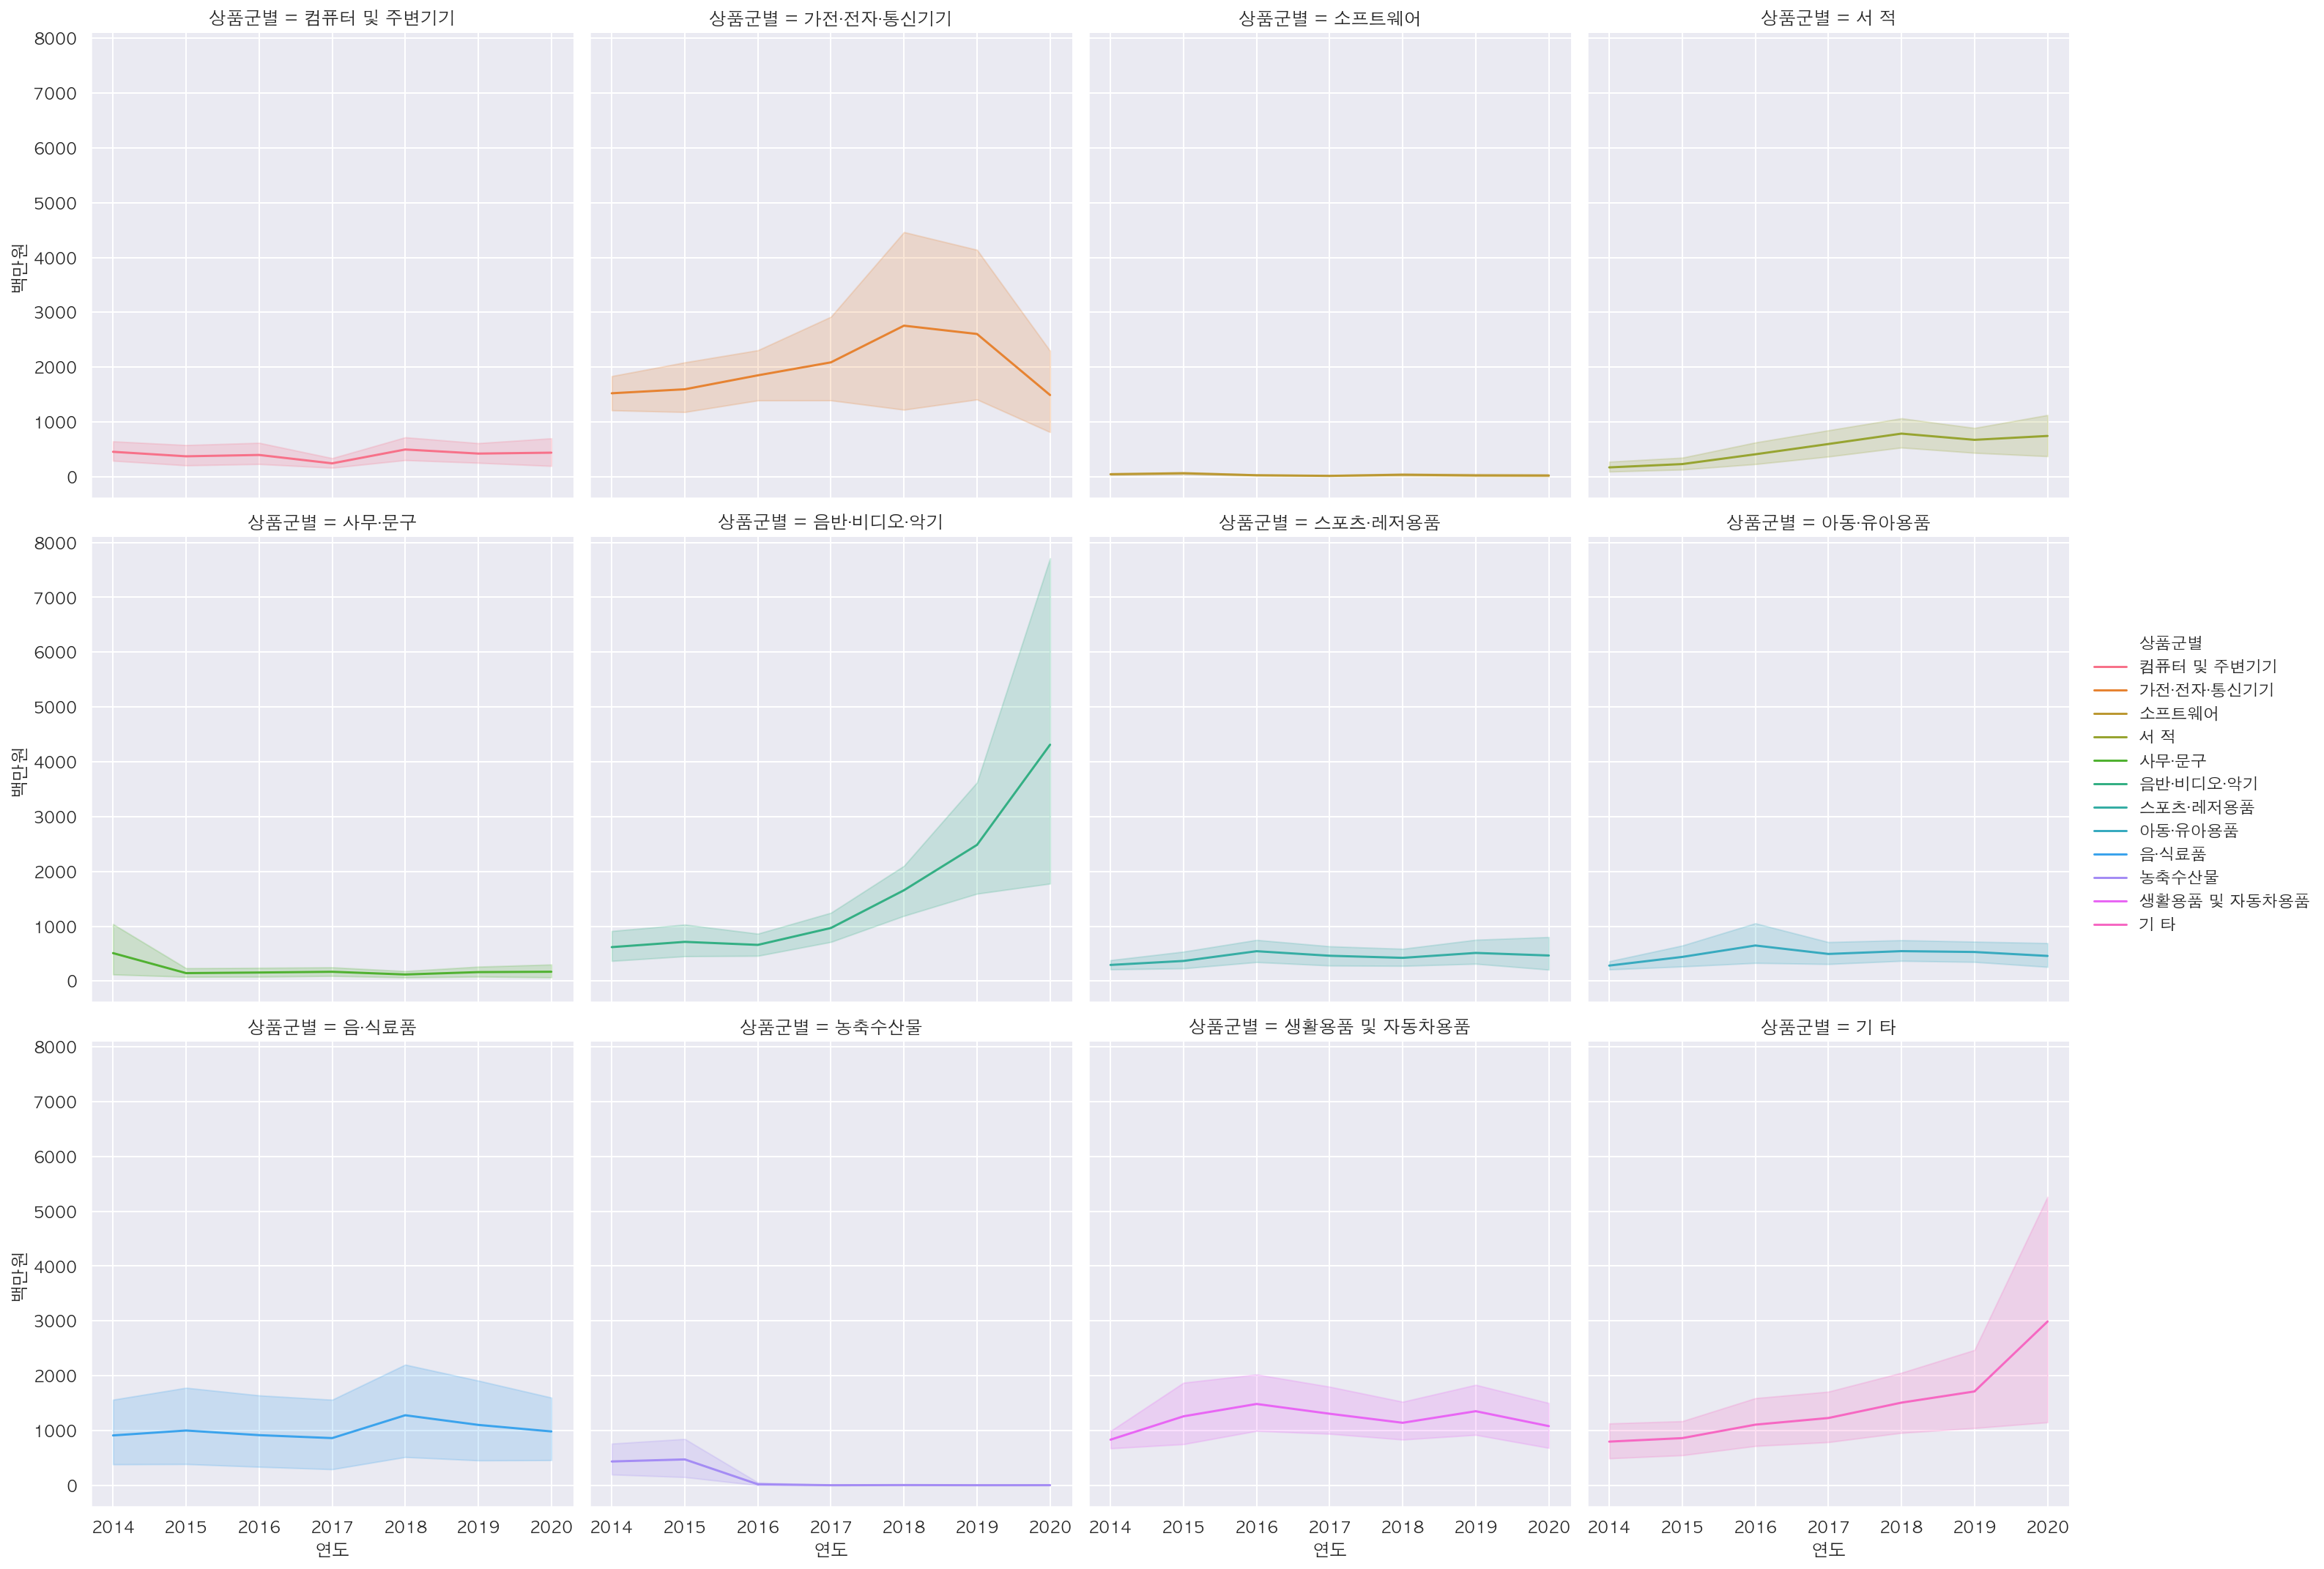

In [83]:
sns.relplot(data = df_sub,x = "연도", y = "백만원", hue="상품군별", 
            kind="line", col="상품군별", col_wrap=4)

In [84]:
# 화장품의 온라인쇼핑 해외직접판매액

df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()

In [85]:
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,EU,화장품,계,2014 1/4,937.0,2014,1


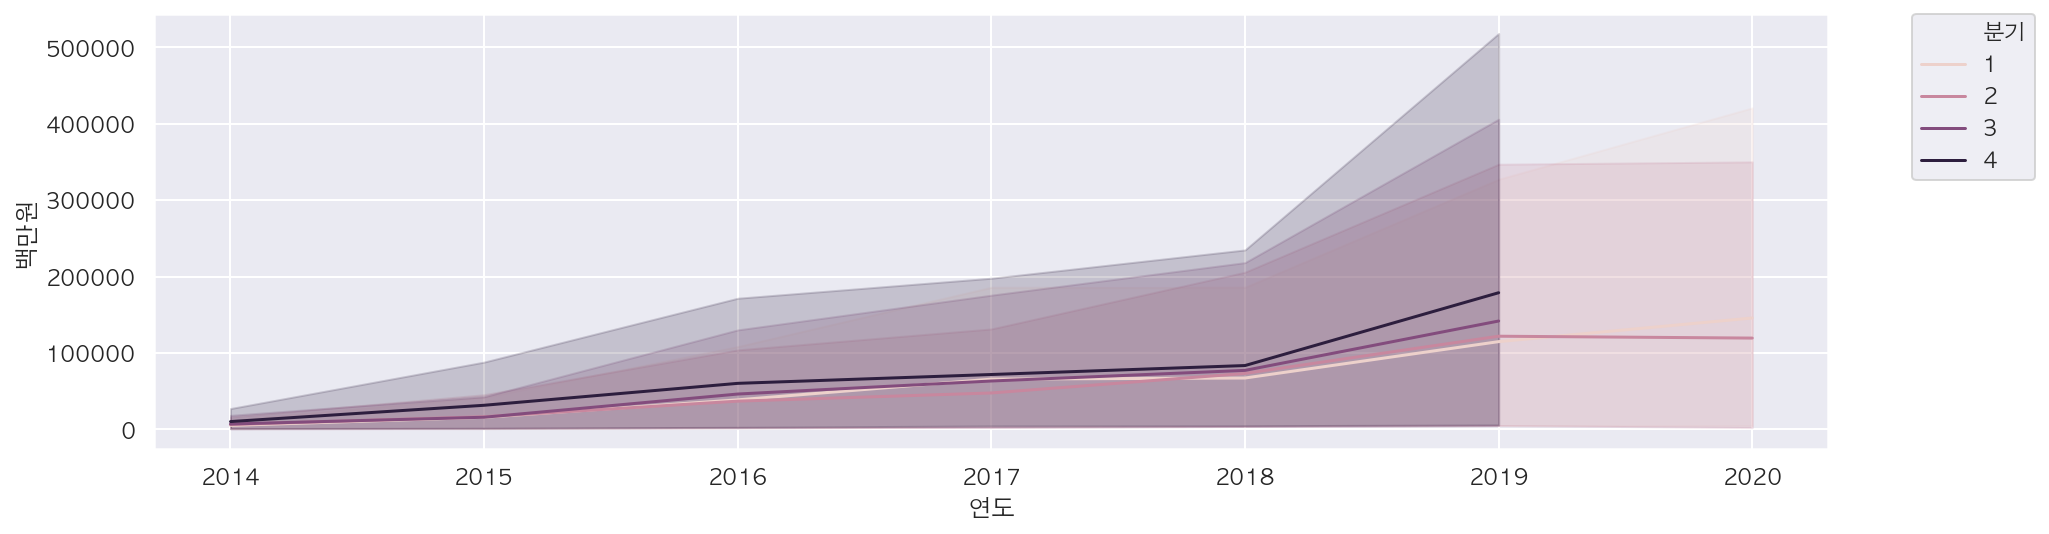

In [88]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df_cosmetic, x = "연도", y = "백만원", hue="분기")
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad=0.)

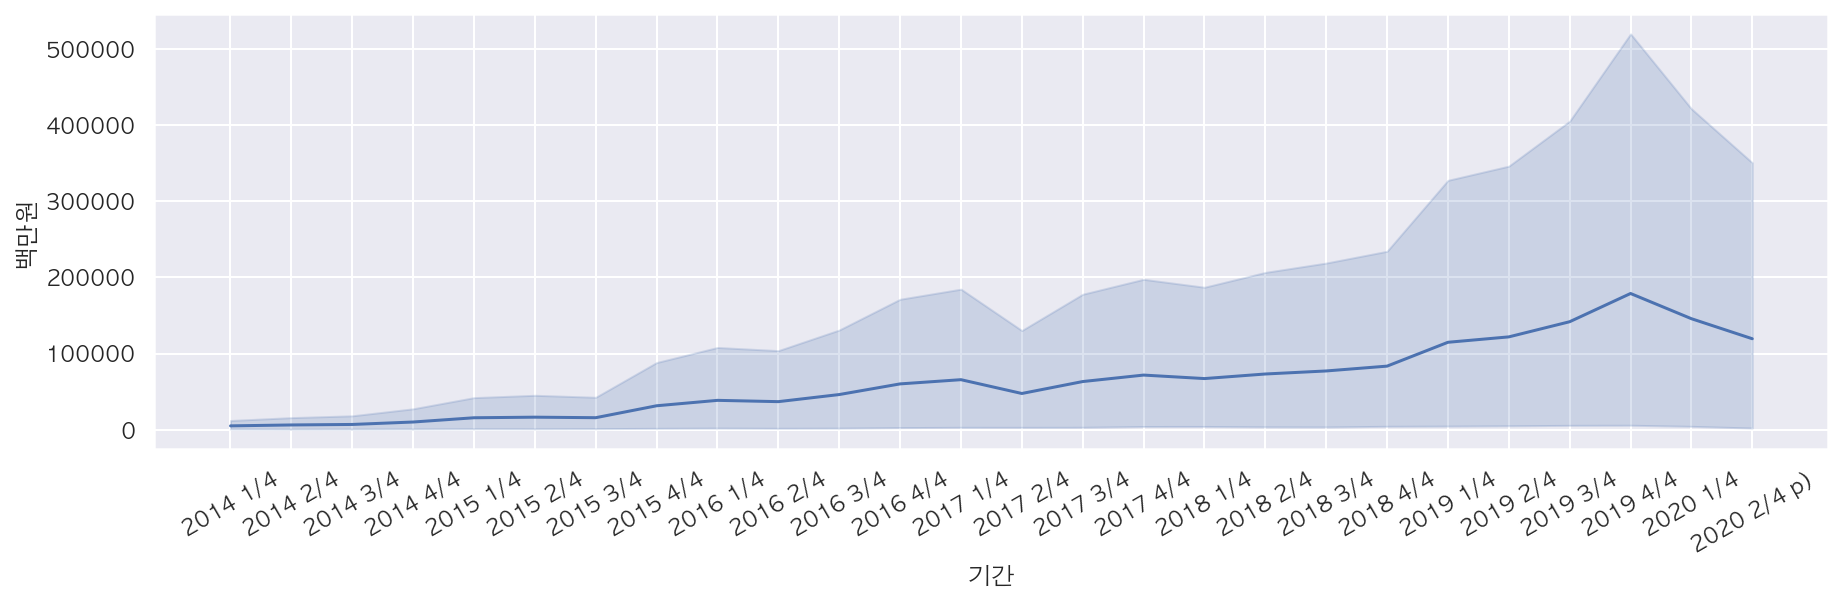

In [90]:
plt.figure(figsize = (15,4))
plt.xticks(rotation=30) # x축의 이름을 얼마나 회전시킬것인가
sns.lineplot(data = df_cosmetic, x="기간", y="백만원")

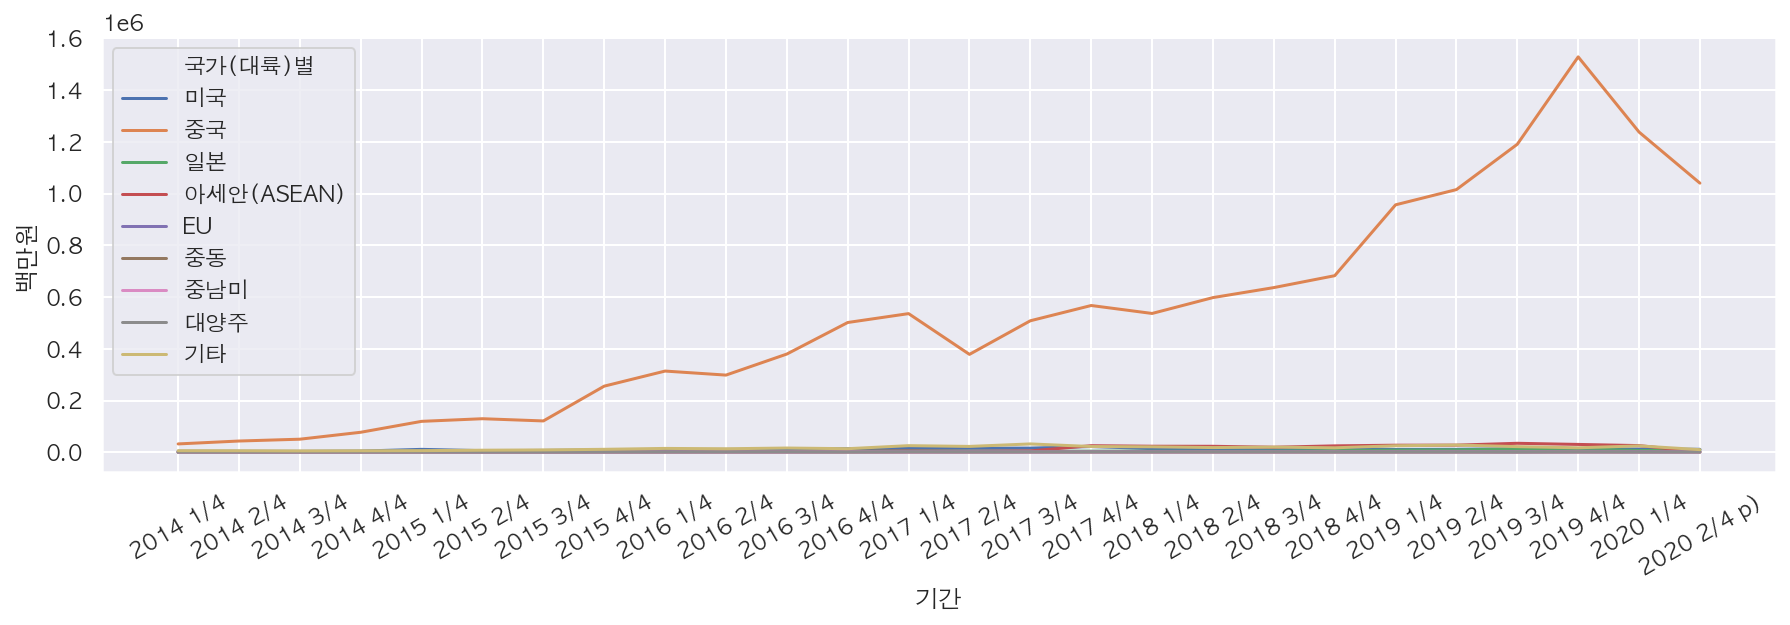

In [91]:
plt.figure(figsize = (15,4))
plt.xticks(rotation=30) # x축의 이름을 얼마나 회전시킬것인가
sns.lineplot(data = df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

In [92]:
# 중국의 데이터가 너무 크기 때문에 제외하고 한 번 파악해보자

df_cosmetic_not_china = df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"].copy()

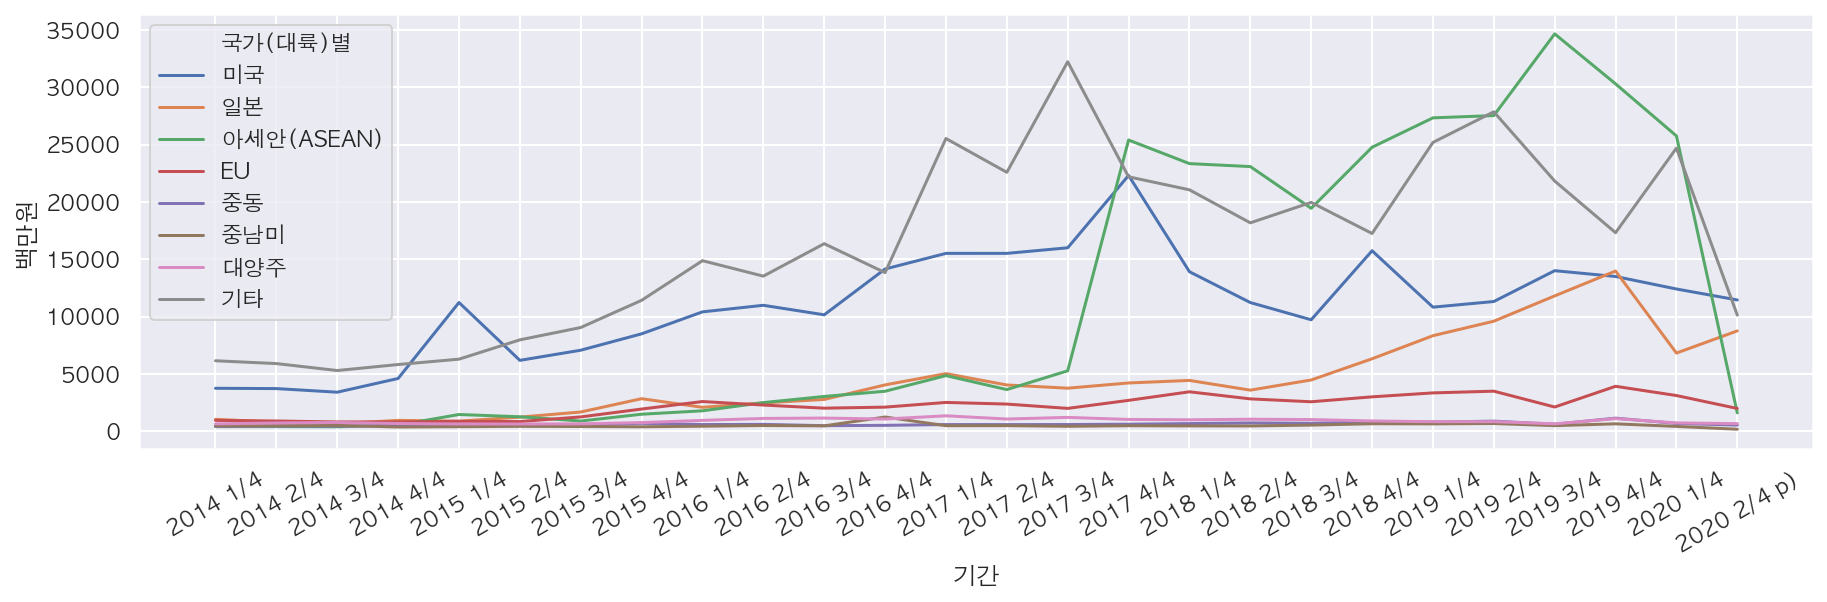

In [94]:
plt.figure(figsize = (15,4))
plt.xticks(rotation=30) # x축의 이름을 얼마나 회전시킬것인가
sns.lineplot(data = df_cosmetic_not_china, x="기간", y="백만원", hue="국가(대륙)별")


# sns.lineplot(data = df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간",y="백만원", hue="국가(대륙)별")

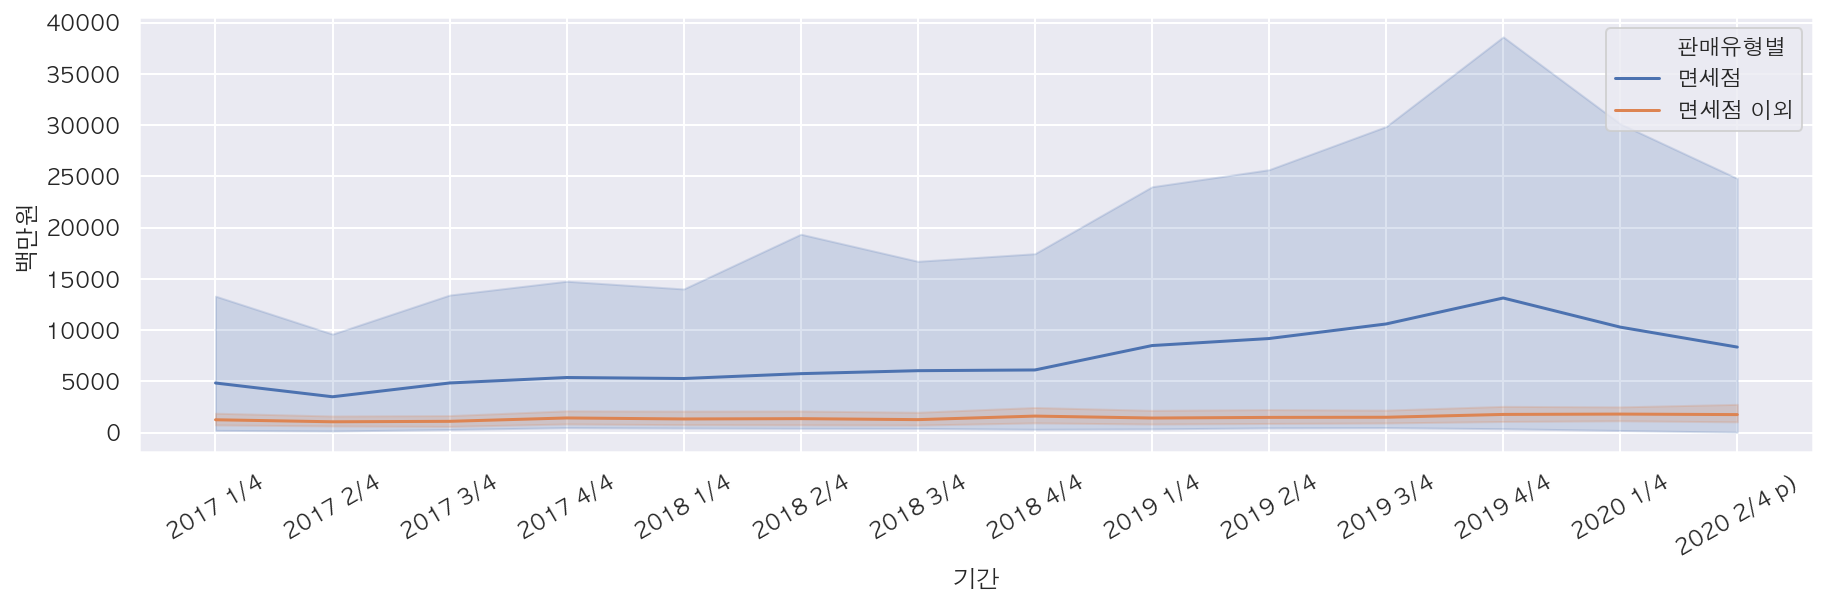

In [97]:
# 화장품 판매액에 대한 기간별 금액 데이터를 시각화하고 "판매유형별"로 다른 색상으로 표시

df_sub = df[df["판매유형별"] != "계"].copy()


plt.figure(figsize = (15,4))
plt.xticks(rotation=30)
sns.lineplot(data = df_sub, x="기간", y="백만원", hue="판매유형별")

In [104]:
# 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

df_fashion = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] == "계")].copy()
df_fashion2 = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] != "계")].copy()

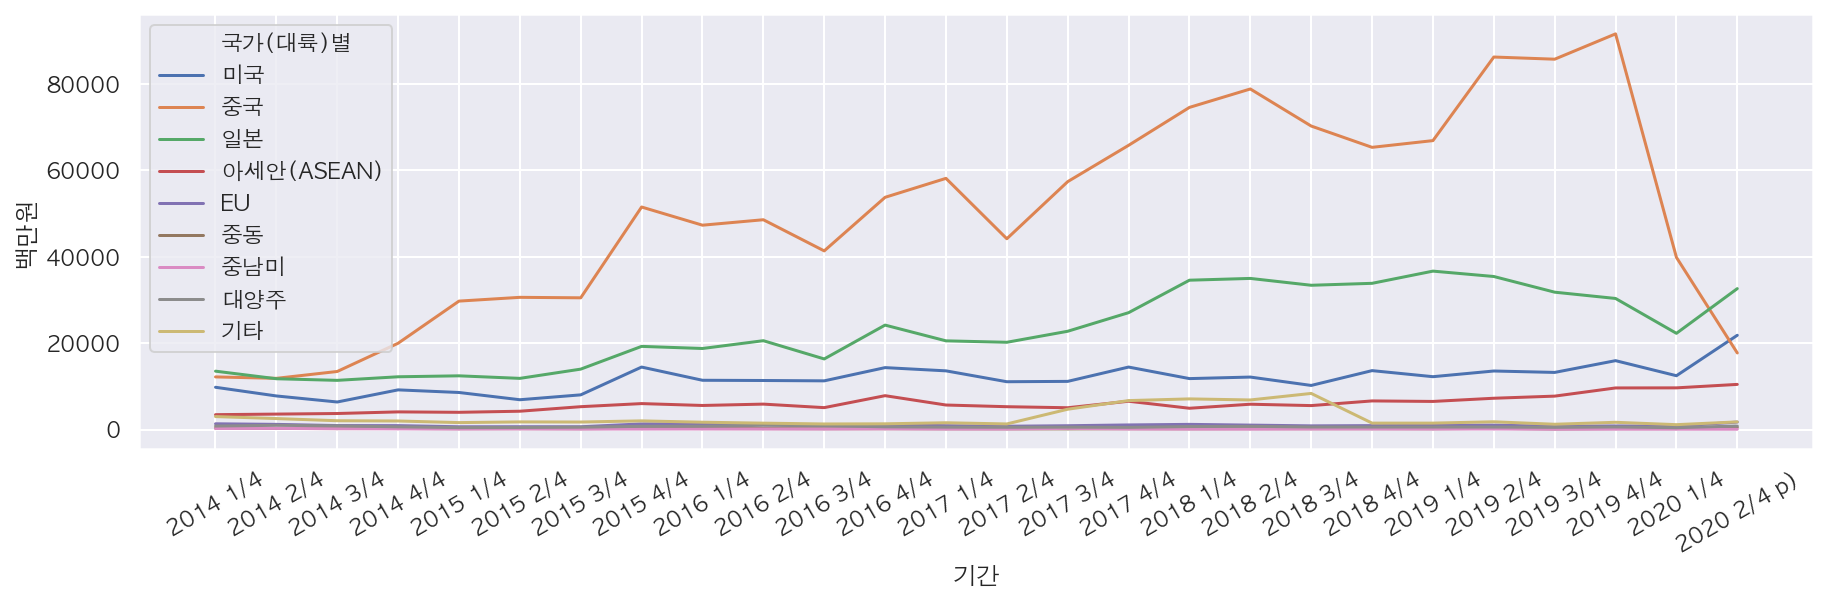

In [102]:
plt.figure(figsize = (15,4))
plt.xticks(rotation=30)
sns.lineplot(data = df_fashion, x="기간", y = "백만원", hue = "국가(대륙)별")

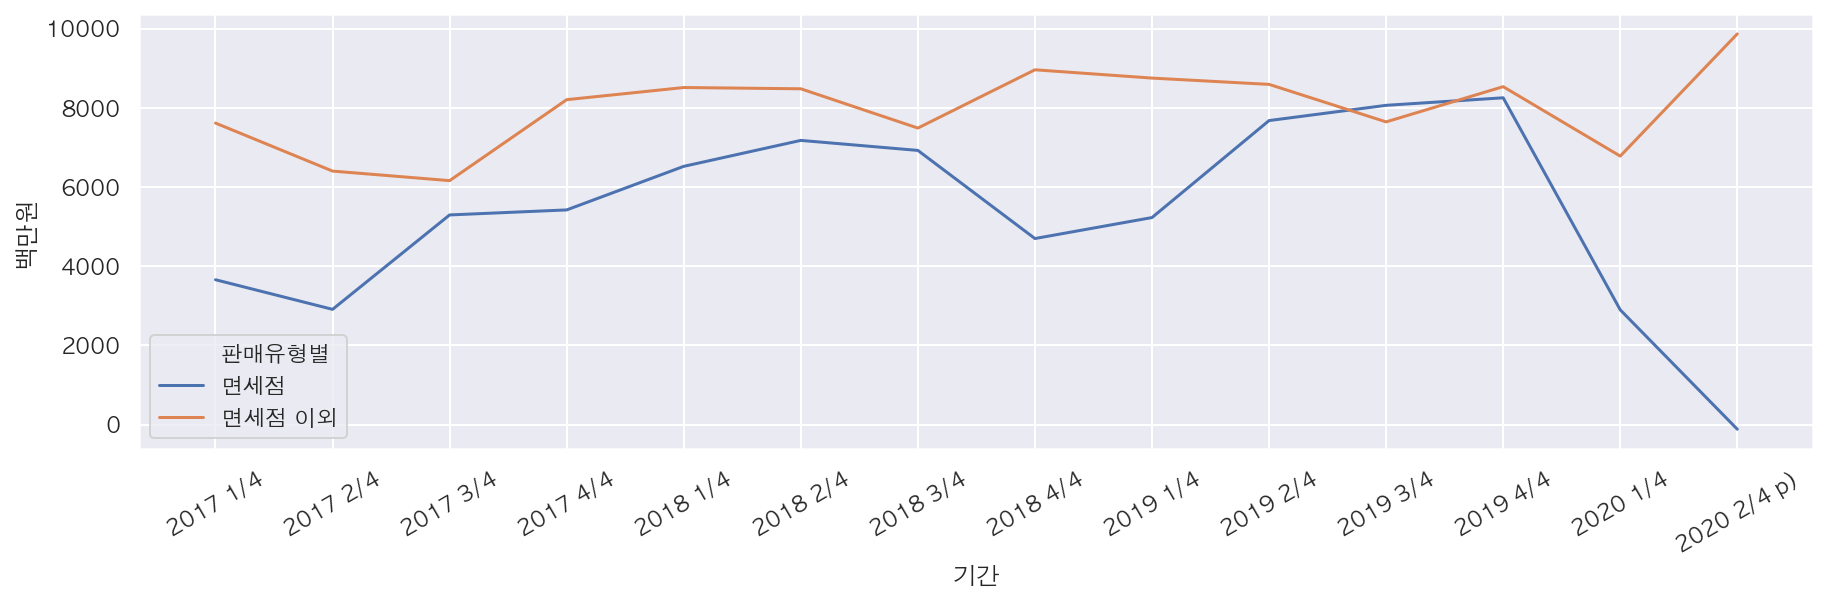

In [106]:
plt.figure(figsize = (15,4))
plt.xticks(rotation=30)
sns.lineplot(data = df_fashion2, x="기간", y = "백만원", hue = "판매유형별", ci=None)

In [112]:
# 데이터 집계하기
df_fashion
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", 
                       values = "백만원", aggfunc = "sum")

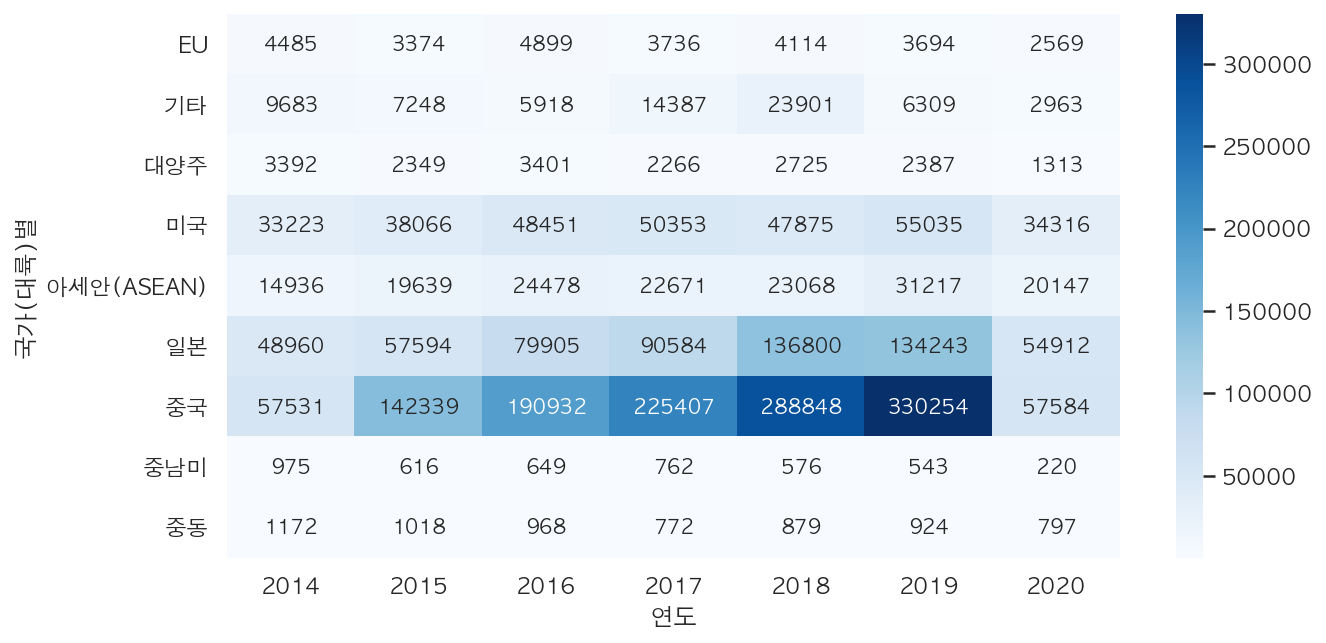

In [118]:
plt.figure(figsize = (10,5))
sns.heatmap(result, cmap="Blues", annot = True, fmt=".0f")

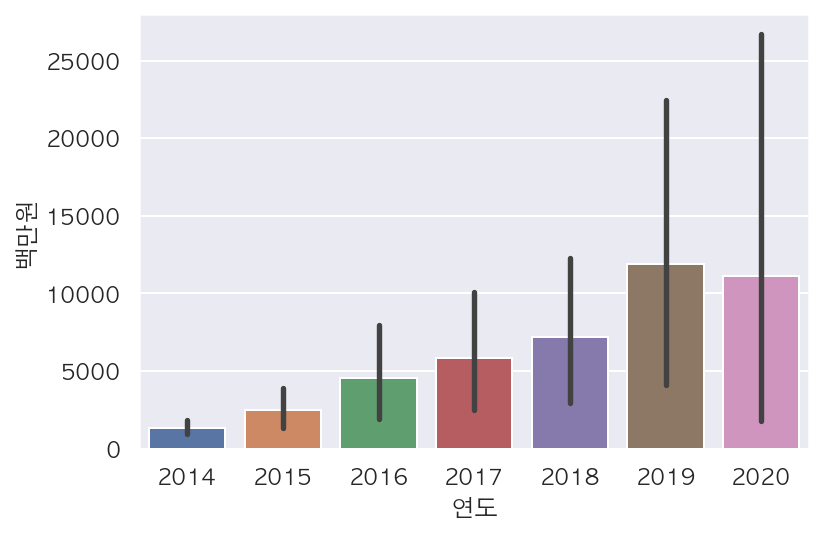

In [120]:
# 전체 상품군별로 온라인쇼핑 해외직접판매액을 분석

sns.barplot(data = df_total, x ="연도", y="백만원")

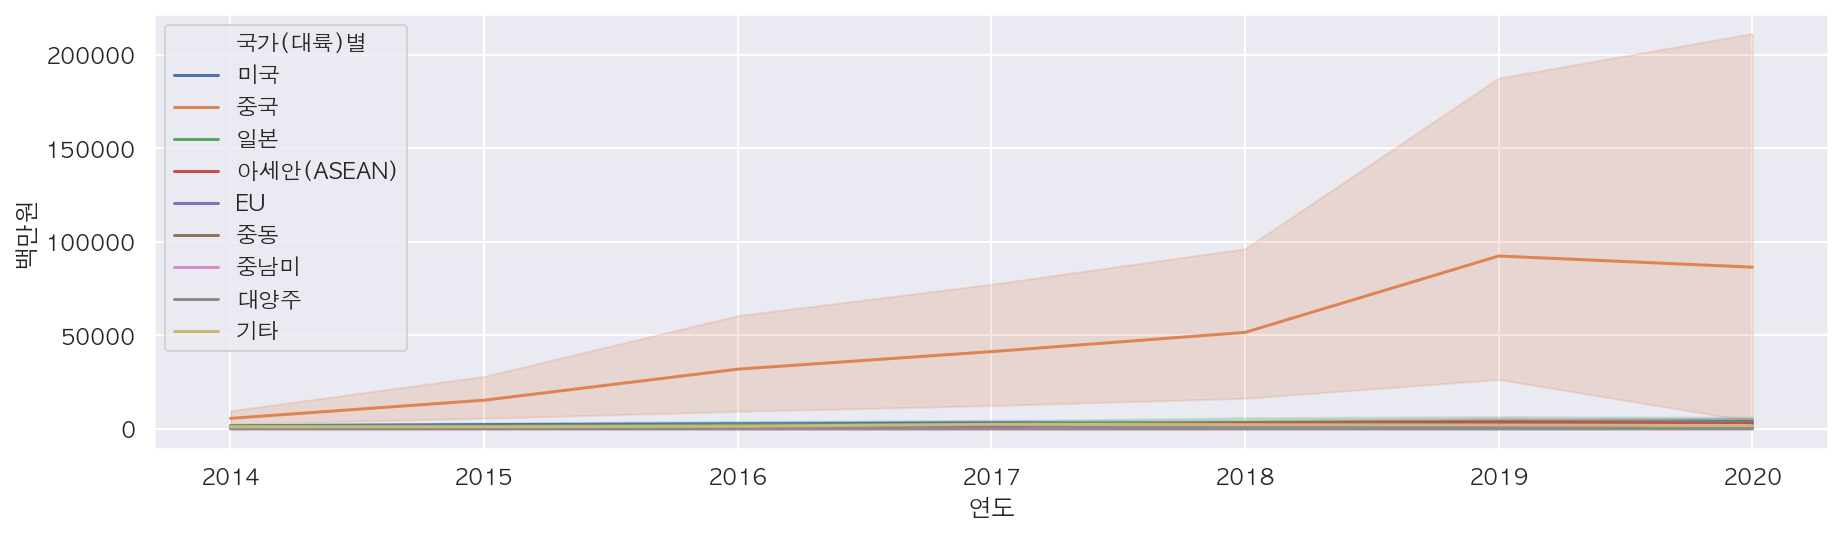

In [123]:
plt.figure(figsize=(15,4))
sns.lineplot(data = df_total, x ="연도", y="백만원", hue="국가(대륙)별")

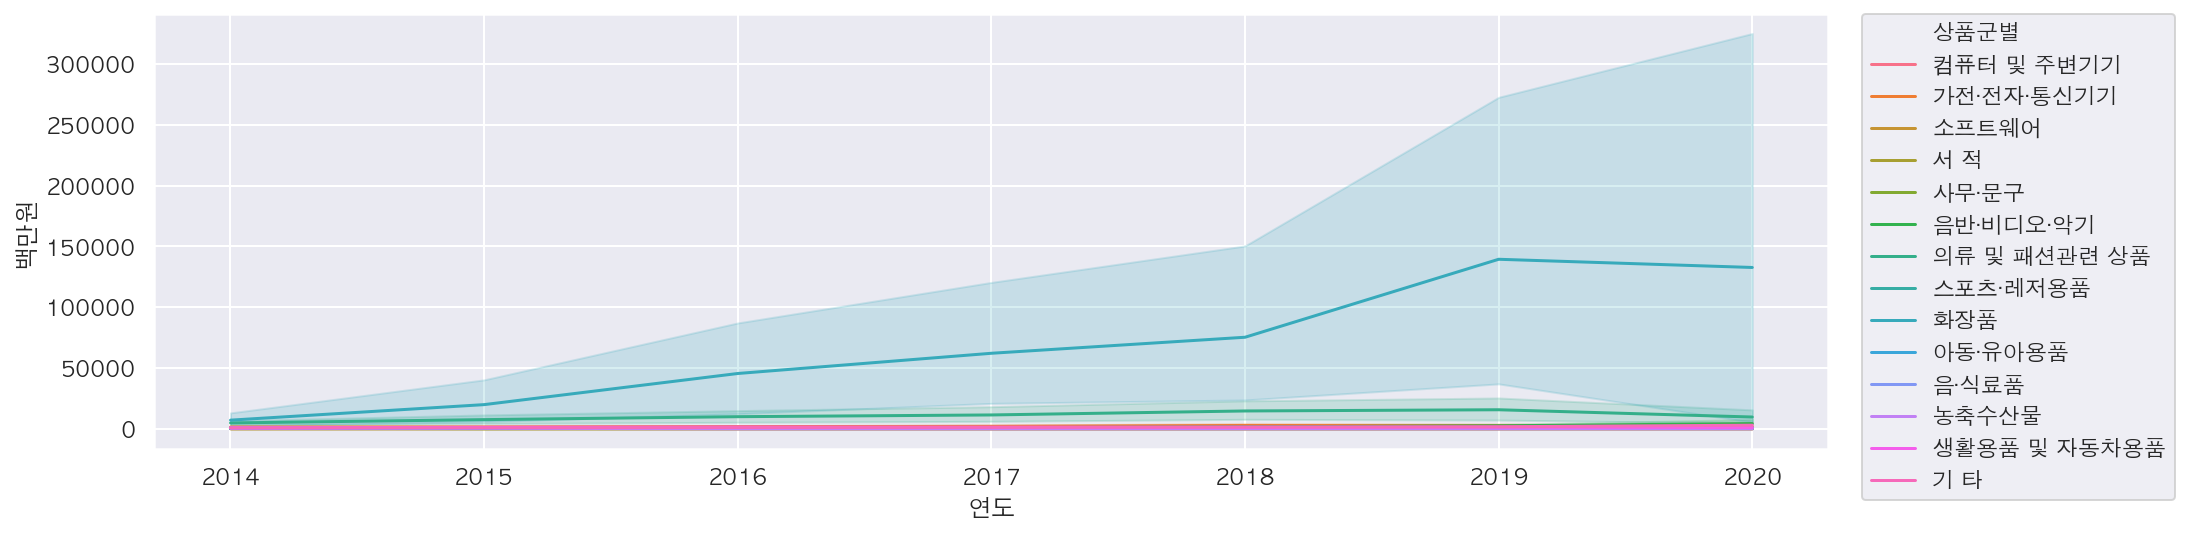

In [126]:
plt.figure(figsize=(15,4))
sns.lineplot(data = df_total, x ="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02,1), loc = 2, borderaxespad=0.)